In [1]:
# @title Install Librarires
!pip install asyncpraw
!pip install IMDbPY
!pip install nltk
!pip install better_profanity
!pip install -q pandas pyLDAvis bertopic nltk gdown matplotlib seaborn wordcloud
!pip install numpy==1.25.2
!pip install --upgrade --force-reinstall gensim
!pip install networkx matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.4/196.4 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 297.2/297.2 kB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.1/46.1 kB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 2.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 26.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 150.6/150.6 kB 9.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.7/26.7 MB 15.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 21.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.6/38.6 MB 8.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 16.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/2

  Using cached gensim-4.3.3-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (8.1 kB)
^C
^C


In [1]:
# @title Importing Methods
import requests
from datetime import datetime
import requests.auth
import time
import asyncpraw
import pandas as pd
from imdb import IMDb
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from better_profanity import profanity
import asyncio
import pandas as pd
from textblob import TextBlob
import numpy as np
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
import gensim
import gensim.corpora as corpora
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
from gensim.models import Phrases
from bertopic import BERTopic
from gensim.models.coherencemodel import CoherenceModel
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt
import seaborn as sns
import torch
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from sklearn.decomposition import LatentDirichletAllocation
from transformers import pipeline
# Download required NLTK resources
nltk.download('punkt')
nltk.download("stopwords")
nltk.download("punkt")
nltk.download("wordnet")
from better_profanity import profanity
import asyncio
import pandas as pd
from textblob import TextBlob
import numpy as np
# Download NLTK resources
nltk.download('punkt_tab')
nltk.download("stopwords")
nltk.download("punkt")
nltk.download("wordnet")
nltk.download('vader_lexicon')

/usr/local/lib/python3.11/dist-packages/hdbscan/plots.py:448: DeprecationWarning: invalid escape sequence '\l'
  axis.set_ylabel('$\lambda$ value')
/usr/local/lib/python3.11/dist-packages/hdbscan/robust_single_linkage_.py:154: DeprecationWarning: invalid escape sequence '\{'
  """Perform robust single linkage clustering from a vector array
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package pun

True

In [6]:
# @title Initializing Reddit API
reddit = asyncpraw.Reddit(
    client_id="1Y316OaACbbXXjGOEJBdrg",
    client_secret="WicmWWNAYr-m0k1T87cV-Nix4RA-qA",
    password="Manas19mondal@",
    user_agent="Comment Extraction (by u/DiligentFinance8923)",
    username="DiligentFinance8923",
)

In [3]:
# @title Reddit Network Analysis of subreddit r/movies
import asyncpraw
import asyncio
import pandas as pd

async def get_posts(sub_name, n):
    reddit = asyncpraw.Reddit(
        client_id="1Y316OaACbbXXjGOEJBdrg",
        client_secret="WicmWWNAYr-m0k1T87cV-Nix4RA-qA",
        password="Manas19mondal@",
        user_agent="Comment Extraction (by u/DiligentFinance8923)",
        username="DiligentFinance8923",
    )

    subreddit = await reddit.subreddit(sub_name)
    posts_list = []

    async for submission in subreddit.top(time_filter="all", limit=n):
        info_list = [
            submission.id,
            submission.score,
            str(submission.author),
            submission.num_comments,
            submission.subreddit.display_name
        ]
        posts_list.append(info_list)

    await reddit.close()

    # Convert to DataFrame
    posts_df = pd.DataFrame(posts_list, columns=['id', 'score', 'author', 'num_comments', 'subreddit'])
    return posts_df

async def main():
    df_posts = await get_posts("movies", 500)
    return df_posts

# Run the function and store the DataFrame
df_posts = await main()

# Display the DataFrame
import IPython.display as display
display.display(df_posts)


,id,score,author,num_comments,subreddit
0,62sjuh,438467,serventofgaben,5175,movies
1,11ia0od,297697,lionsgate,33261,movies
2,iikebv,201679,whereami1928,9695,movies
3,tzxev3,198513,lionsgate,26200,movies
4,ztqlgb,197602,officialtobeymaguire,17464,movies
...,...,...,...,...,...
495,ab61dz,51336,RokuKyoshiAang,1332,movies
496,c0nkqt,51307,Dylan_Mq,2530,movies
497,6j80vq,51298,lookglen,1424,movies
498,f9w00u,51283,chanma50,2671,movies


In [4]:
df_posts = df_posts.to_csv("df_posts.csv", index=False)

[Text(0.5, 0, 'Score'), Text(0, 0.5, 'Comments')]

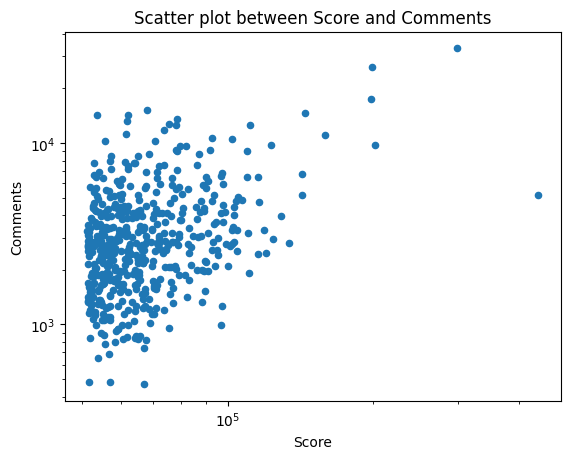

In [ ]:
# relationship between comments and upvotes
ax = df_posts.plot('score', 'num_comments', kind = 'scatter',logx=True, logy=True, title='Scatter plot between Score and Comments')
ax.set(xlabel="Score", ylabel="Comments")


In [ ]:
repeating = df_posts[df_posts.duplicated(['author'], keep = False)]
repeating = repeating[repeating.author != 'None']
u_authors = df_posts[df_posts.duplicated(['author'], keep = False)] #users witch multiple posts
print(repeating.author.nunique() )
u_authors = list(repeating.author.unique())

import asyncpraw
import asyncio
import pandas as pd
from IPython import display

----------------------------------------
async def get_user_posts(author, n):
    redditor = await reddit.redditor(author)
    user_posts_list = []

    async for submission in redditor.submissions.top(limit=n):
        user_posts_list.append([
            submission.id,
            submission.score,
            str(submission.author),
            submission.num_comments,
            str(submission.subreddit)
        ])

    # Sort by score (descending)
    user_posts_list.sort(key=lambda x: x[1], reverse=True)

    # Convert to DataFrame
    user_posts_df = pd.DataFrame(user_posts_list, columns=['id', 'score', 'author', 'num_comments', 'subreddit'])

    return user_posts_df


async def main(u_authors):
    all_posts_df = pd.DataFrame()  # To hold data from all authors

    for author in u_authors:
        try:
            print(f"Fetching posts for user: {author}")
            a_df = await get_user_posts(author, 10)  # Get top 10 posts for the author
            all_posts_df = pd.concat([all_posts_df, a_df], ignore_index=True)  # Append to main dataframe
        except Exception as e:
            print(f"Error fetching posts for {author}: {e}")


    return all_posts_df


all_posts_df = await main(u_authors)


display.display(all_posts_df)
print(all_posts_df.head())

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 [Text(0, 0, 'movies'),
  Text(1, 0, 'television'),
  Text(2, 0, 'pics'),
  Text(3, 0, 'news'),
  Text(4, 0, 'marvelstudios'),
  Text(5, 0, 'worldnews'),
  Text(6, 0, 'aww'),
  Text(7, 0, 'StarWars'),
  Text(8, 0, 'politics'),
  Text(9, 0, 'TheSimpsons'),
  Text(10, 0, 'Games'),
  Text(11, 0, 'technology'),
  Text(12, 0, 'funny'),
  Text(13, 0, 'LivestreamFail'),
  Text(14, 0, 'todayilearned')])

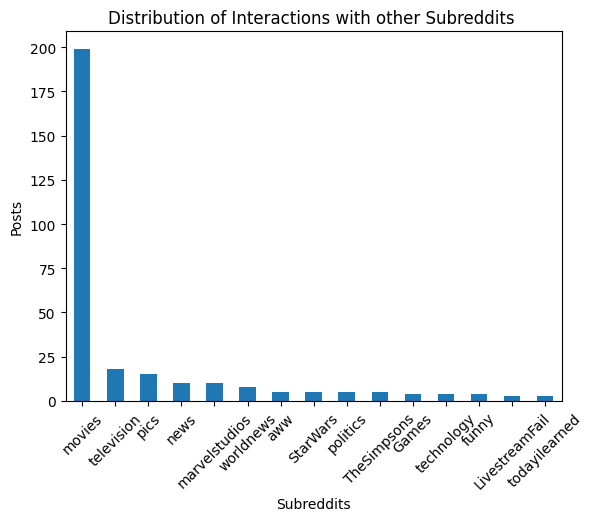

In [ ]:
counts = all_posts_df['subreddit'].value_counts()
ax = all_posts_df[all_posts_df['subreddit'].isin(counts[counts > 2].index)].subreddit.value_counts().plot(kind='bar',title='Distribution of Interactions with other Subreddits ')
ax.set(xlabel="Subreddits", ylabel="Posts")
plt.xticks(rotation=45)

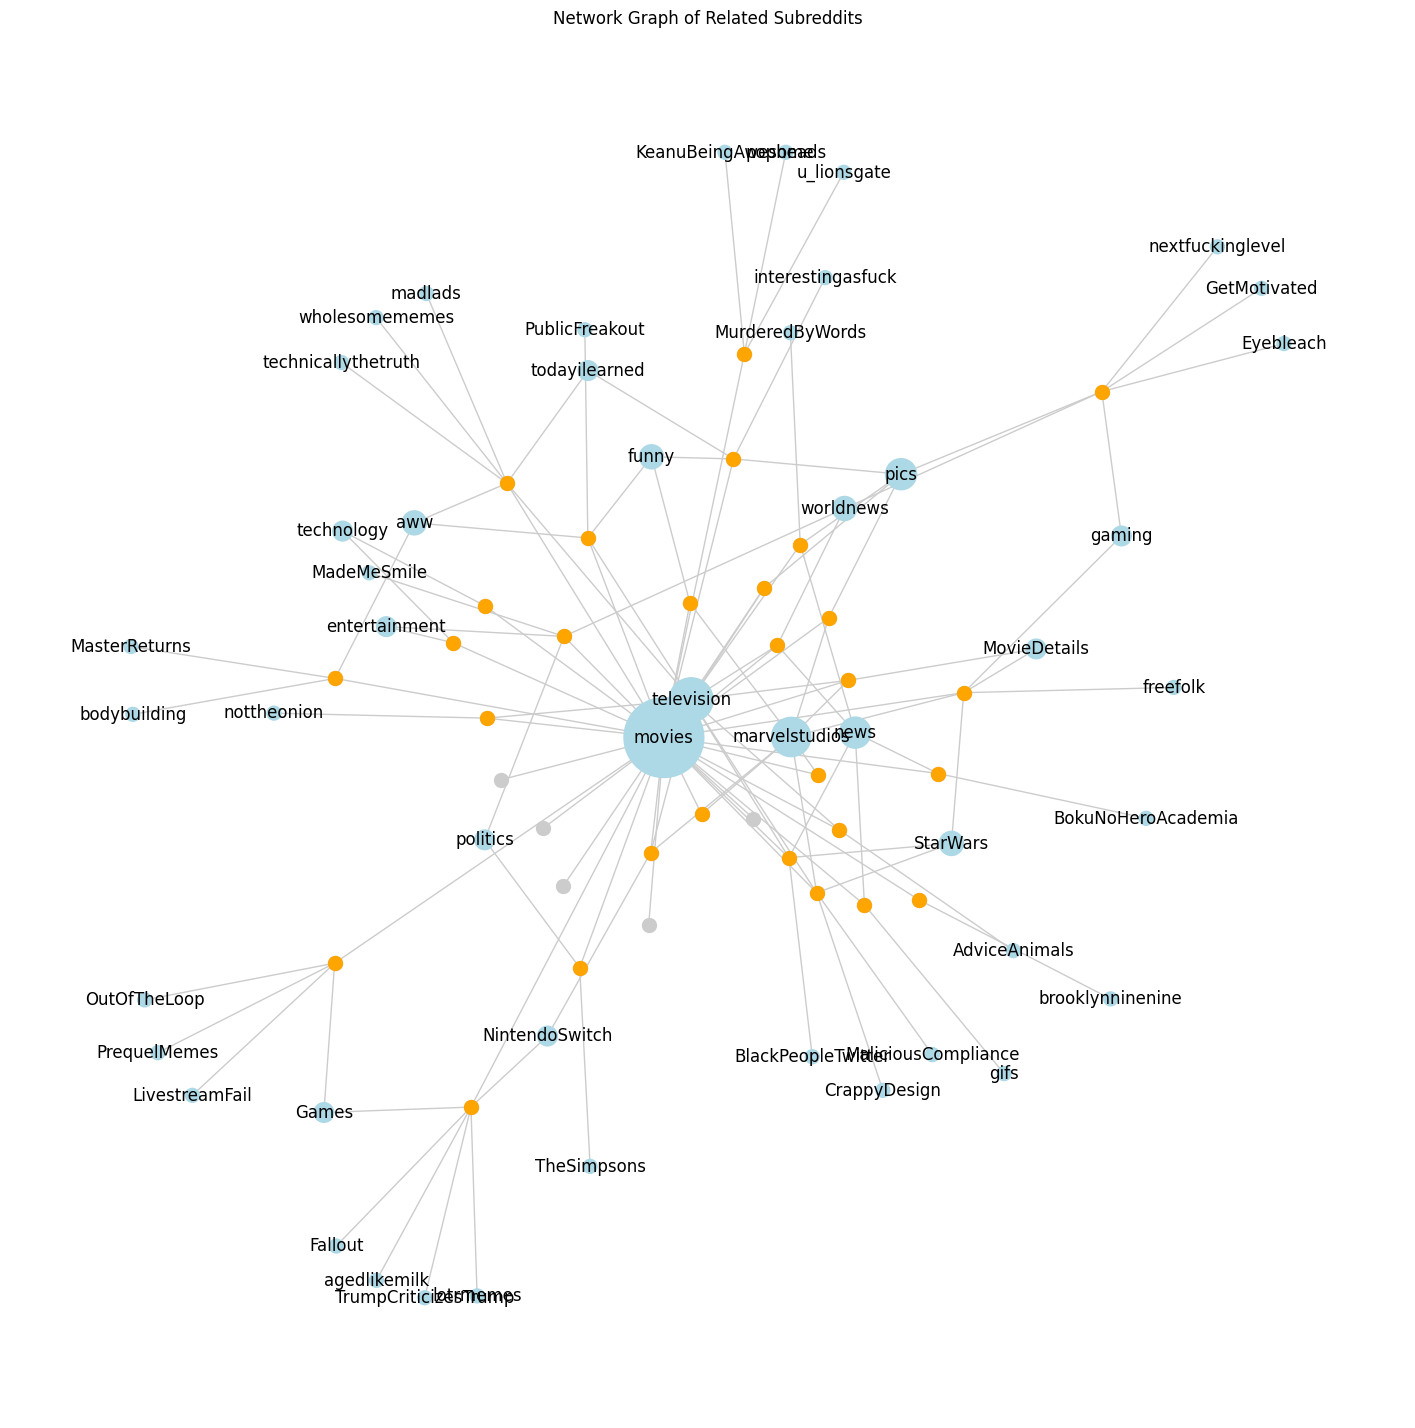

In [ ]:
n_df = all_posts_df[['author', 'subreddit']] # dataframe for network graph purposes
subs = list(n_df.subreddit.unique())

import networkx as nx
plt.figure(figsize=(18, 18))

# graph from the dataframe
g = nx.from_pandas_edgelist(n_df, source='author', target='subreddit')

# layout for nodes
layout = nx.spring_layout(g,iterations=50,scale=2)


sub_size = [g.degree(sub) * 100 for sub in subs]
nx.draw_networkx_nodes(g,
                       layout,
                       nodelist=subs,
                       node_size=sub_size, # a LIST of sizes, based on g.degree
                       node_color='lightblue')

# the entities
nx.draw_networkx_nodes(g, layout, nodelist=u_authors, node_color='#cccccc', node_size=100)

# highly connected influencers
popular_people = [person for person in u_authors if g.degree(person) > 1]
nx.draw_networkx_nodes(g, layout, nodelist=popular_people, node_color='orange', node_size=100)

nx.draw_networkx_edges(g, layout, width=1, edge_color="#cccccc")

node_labels = dict(zip(subs, subs)) #labels for subs
nx.draw_networkx_labels(g, layout, labels=node_labels)

plt.axis('off')
plt.title("Network Graph of Related Subreddits")
plt.savefig("NetworkGraph", bbox_inches='tight',pad_inches=0.5)
plt.show()

In [9]:
# @title Data Extraction

# List of movie titles
movies = [ "Captain America: Brave New World"]
 #[ "Captain America: Brave New World","Mickey 17"]

async def fetch_comments():
    all_comments = []

    for movie in movies:
        # Search for posts in r/movies
        subreddit = await reddit.subreddit("movies")
        async for submission in subreddit.search(movie, sort="relevance", limit=3):  # Fetch top 3 relevant posts
            await submission.load()
            await submission.comments.replace_more(limit= None)  # Get all comments

            # Format timestamp for the submission
            post_timestamp = datetime.utcfromtimestamp(submission.created_utc).strftime('%d/%m/%Y')

            for comment in submission.comments.list():
                comment_timestamp = datetime.utcfromtimestamp(comment.created_utc).strftime('%d/%m/%Y')  # Format comment timestamp
                all_comments.append({
                    "Movie Title": movie,
                    "Post Title": submission.title,
                    "Timestamp": comment_timestamp,
                    "Comment": comment.body,
                    "Author": str(comment.author),
                    "Score": comment.score
                })


    df = pd.DataFrame(all_comments)
    return df


try:
    df_comments = asyncio.run(fetch_comments())
except RuntimeError:
    df_comments = await fetch_comments()



print(df_comments.head())



                        Movie Title  \
0  Captain America: Brave New World   
1  Captain America: Brave New World   
2  Captain America: Brave New World   
3  Captain America: Brave New World   
4  Captain America: Brave New World   

                                          Post Title   Timestamp  \
0  Official Discussion - Captain America: Brave N...  14/02/2025   
1  Official Discussion - Captain America: Brave N...  14/02/2025   
2  Official Discussion - Captain America: Brave N...  14/02/2025   
3  Official Discussion - Captain America: Brave N...  14/02/2025   
4  Official Discussion - Captain America: Brave N...  14/02/2025   

                                             Comment       Author  Score  
0  Is there a lore reason why the head of securit...    jwederell    938  
1  Does anyone feel like 80% of the movie was clo...  superbiondo    581  
2  Man seeing Isaiah cry and his PTSD trigger whe...  Elite_Alice    501  
3  I laughed at young General Ross, but no one el...    

<ipython-input-9-e3247cc1071c>:39: RuntimeWarning: coroutine 'fetch_comments' was never awaited
  df_comments = await fetch_comments()


In [10]:
data_for_comments_analysis = df_comments.to_csv("data_for_comments_analysis.csv", index=False)

In [ ]:
ia = IMDb()

# List of movies to search for
movies = ["Mickey 17","Captain America: Brave New World"]
 #[ "Captain America: Brave New World","Mickey 17"]

#empty list to store results
movie_data = []

for movie_name in movies:
    search_results = ia.search_movie(movie_name)

    if search_results:
        movie = search_results[0]  # Get the first match
        movie_id = movie.movieID

        # Fetch full movie details
        movie_details = ia.get_movie(movie_id)
        release_date_str = movie_details.get('original air date', 'Release date not found')


        match = re.search(r"(\d{1,2} \w{3} \d{4})", str(release_date_str))

        if match:

            parsed_date = datetime.strptime(match.group(1), "%d %b %Y").strftime("%d/%m/%Y")
        else:
            parsed_date = "Release date not found"

        movie_data.append({"Movie Title": movie_name, "release_date": parsed_date})
    else:
        movie_data.append({"Movie Title": movie_name, "release_date": "Not found"})


df = pd.DataFrame(movie_data)


print(df)

                        Movie Title release_date
0                         Mickey 17   07/03/2025
1  Captain America: Brave New World   14/02/2025


In [ ]:
merged_df = df_comments.merge(df, on='Movie Title', how='left')
merged_df["Timestamp"] = pd.to_datetime(merged_df["Timestamp"], format="%d/%m/%Y", errors="coerce", dayfirst=True)
merged_df["release_date"] = pd.to_datetime(merged_df["release_date"], format="%d/%m/%Y", errors="coerce", dayfirst=True)
merged_df["Release Status"] = np.where(merged_df["Timestamp"] >= merged_df["release_date"], "Post-Release", "Pre-Release")
merged_df["Days"] = (merged_df["Timestamp"] - merged_df["release_date"]).dt.days
merged_df = merged_df[(merged_df["Days"] >= -60) & (merged_df["Days"] <= 60)]
merged_df.head()
clean_df = merged_df

In [ ]:
# @title Comments Cleaning

stop_words = set(stopwords.words("english"))
stop_words.update(["movie", "movies", "movie's", "Mickey","mickey","really","one","think","film"])  # Add variations
lemmatizer = WordNetLemmatizer()

def clean_text(text):
    # Step 1: Normalize text (lowercase + fix punctuation)
    text = text.lower()
    text = re.sub(r"http\S+", "", text)  # Remove URLs
    text = re.sub(r"[^\w\s]", " ", text)  # Replace punctuation with space
    text = re.sub(r"\s+", " ", text)  # Collapse spaces
    text = re.sub(r'[0-9]+', '', text)  # Remove numbers

    # Step 2: Tokenize and clean
    words_list = word_tokenize(text)
    cleaned_words = [
        lemmatizer.lemmatize(word)
        for word in words_list
        if word not in stop_words
    ]

    # Step 3: Remove profanity
    cleaned_words = [
        word
        for word in cleaned_words
        if not profanity.contains_profanity(word)
    ]

    return " ".join(cleaned_words)

# Apply cleaning
clean_df["clean_text"] = clean_df["Comment"].apply(clean_text)


All 'movie' mentions removed successfully!


In [ ]:
print(clean_df[clean_df["Comment"].str.contains("movie", case=True, na=False)])

     Movie Title                                  Post Title  Timestamp  \
7      Mickey 17  Official Discussion - Mickey 17 [SPOILERS] 2025-03-07   
9      Mickey 17  Official Discussion - Mickey 17 [SPOILERS] 2025-03-08   
15     Mickey 17  Official Discussion - Mickey 17 [SPOILERS] 2025-03-07   
16     Mickey 17  Official Discussion - Mickey 17 [SPOILERS] 2025-03-07   
18     Mickey 17  Official Discussion - Mickey 17 [SPOILERS] 2025-03-08   
...          ...                                         ...        ...   
3202   Mickey 17  New Posters for Bong Joon-ho's 'Mickey 17' 2025-01-24   
3208   Mickey 17  New Posters for Bong Joon-ho's 'Mickey 17' 2025-01-23   
3220   Mickey 17  New Posters for Bong Joon-ho's 'Mickey 17' 2025-01-23   
3231   Mickey 17  New Posters for Bong Joon-ho's 'Mickey 17' 2025-01-24   
3261   Mickey 17  New Posters for Bong Joon-ho's 'Mickey 17' 2025-01-24   

                                                Comment          Author  \
7     I know everyone is

In [ ]:
print(clean_df.isnull().sum())
print(clean_df.count())

Movie Title       0
Post Title        0
Timestamp         0
Comment           0
Author            0
Score             0
release_date      0
Release Status    0
Days              0
dtype: int64
Movie Title       3309
Post Title        3309
Timestamp         3309
Comment           3309
Author            3309
Score             3309
release_date      3309
Release Status    3309
Days              3309
dtype: int64


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [ ]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Initialize VADER Sentiment Analyzer
analyzer = SentimentIntensityAnalyzer()

# Function to Get Sentiment using VADER
def get_sentiment(text):

    score = analyzer.polarity_scores(text)['compound']

    # Convert score to label
    if score >= 0.05:
        sentiment = "POSITIVE"
    elif score <= -0.05:
        sentiment = "NEGATIVE"
    else:
        sentiment = "NEUTRAL"

    return sentiment, score

clean_df[["sentiment", "sentiment_score"]] = clean_df["clean_text"].apply(
    lambda text: pd.Series(get_sentiment(text))
)


print(clean_df[["Comment", "clean_text", "sentiment", "sentiment_score"]])


                                                Comment  \
0     Is there a lore reason why the head of securit...   
1     Does anyone feel like 80% of the movie was clo...   
2     Man seeing Isaiah cry and his PTSD trigger whe...   
3     I laughed at young General Ross, but no one el...   
4     The only character I related with in that movi...   
...                                                 ...   
9501  Aw, that’s cute. Trying to get me banned on Re...   
9502  I don't really understand what it is that you'...   
9503                        AHAHAHAHAHAHA YOU DUMB FUCK   
9504         You seem very stable. Good luck, goofball.   
9505  Generally reply threads like this continue til...   

                                             clean_text sentiment  \
0     lore reason head security small distractingly ...   NEUTRAL   
1     anyone feel like close shot never felt like pe...  POSITIVE   
2     man seeing isaiah cry ptsd trigger go back pri...  NEGATIVE   
3     laughed y

In [ ]:
clean_df.head()

,Movie Title,Post Title,Timestamp,Comment,Author,Score,release_date,Release Status,Days,clean_text,sentiment,sentiment_score
0,Mickey 17,Official Discussion - Mickey 17 [SPOILERS],2025-03-07,I loved every scene featuring 17/18 with Nasha...,kidlambo,1311,2025-03-07,Post-Release,0,loved every scene featuring nasha chemistry hi...,POSITIVE,0.5994
1,Mickey 17,Official Discussion - Mickey 17 [SPOILERS],2025-03-07,Anyone want to fill me in on why “the mama” sa...,guitwiz,1037,2025-03-07,Post-Release,0,anyone want fill mama said secret knew mickey ...,POSITIVE,0.0772
2,Mickey 17,Official Discussion - Mickey 17 [SPOILERS],2025-03-07,I don’t understand why they set up the Kai cha...,heyitsmejosh,1710,2025-03-07,Post-Release,0,understand set kai character like mattered dis...,POSITIVE,0.1531
3,Mickey 17,Official Discussion - Mickey 17 [SPOILERS],2025-03-07,“I’m your brother” bitch you weren’t his broth...,Elite_Alice,1635,2025-03-07,Post-Release,0,brother brother put name every loan,NEUTRAL,0.0000
4,Mickey 17,Official Discussion - Mickey 17 [SPOILERS],2025-03-07,Thematically this had so much going on that ve...,joshmoviereview,614,2025-03-07,Post-Release,0,thematically much going little landed disappoi...,NEGATIVE,-0.4256


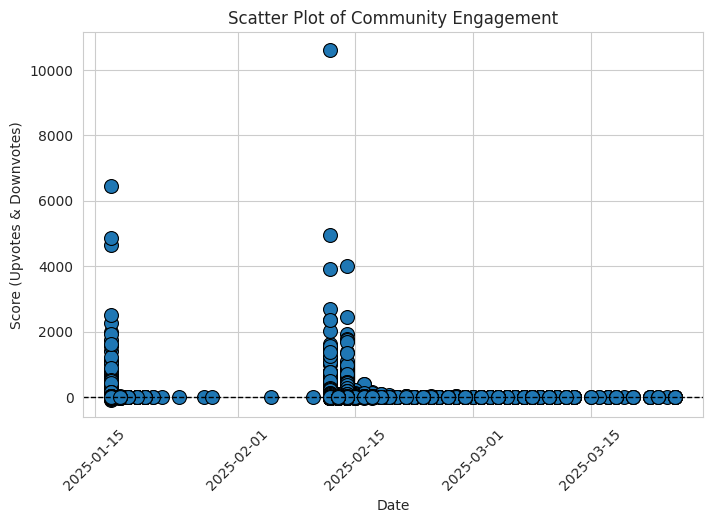

In [ ]:
# Plot
plt.figure(figsize=(8, 5))
sns.scatterplot(x=clean_df["Timestamp"], y=clean_df["Score"], palette="coolwarm", s=100, edgecolor="black")

plt.axhline(0, color="black", linestyle="dashed", linewidth=1)
plt.xlabel("Date")
plt.ylabel("Score (Upvotes & Downvotes)")
plt.title("Scatter Plot of Community Engagement")
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.show()

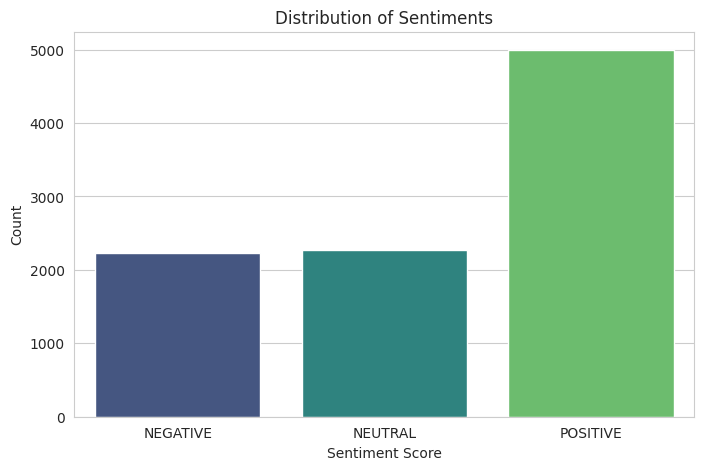

In [ ]:
# Count the occurrences of each sentiment value
sentiment_counts = clean_df["sentiment"].value_counts().sort_index()

# bar chart
plt.figure(figsize=(8, 5))
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette="viridis")
plt.xlabel("Sentiment Score")
plt.ylabel("Count")
plt.title("Distribution of Sentiments")
plt.xticks(rotation=0)
plt.show()


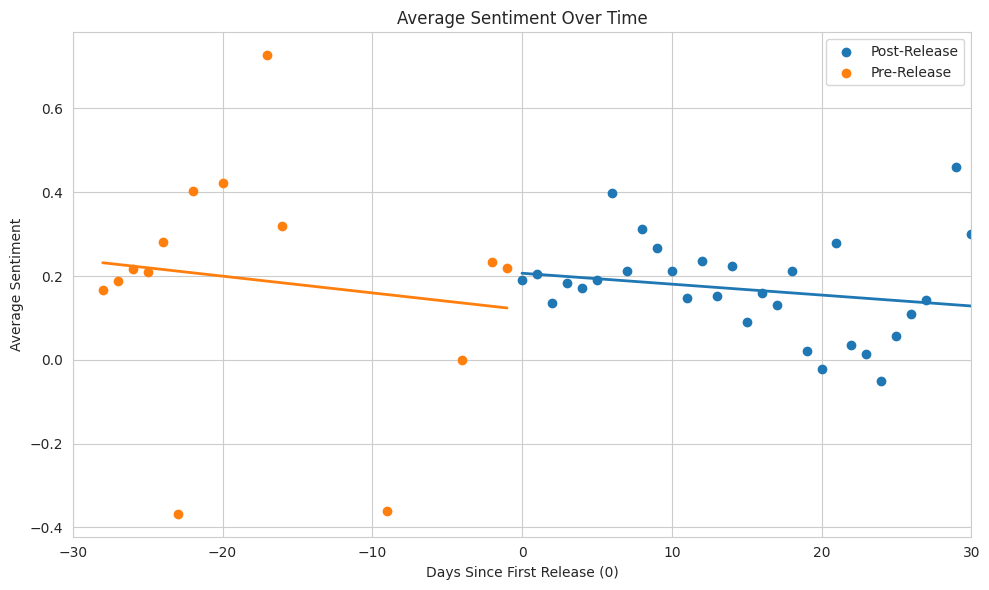

In [ ]:
import seaborn as sns

# Group by 'release_date' and 'Timestamp', then calculate the average sentiment
avg_sentiment_by_release = clean_df.groupby(['Release Status', 'Days'])['sentiment_score'].mean().unstack(level=0)

# Plotting the sentiment over time for each release date
plt.figure(figsize=(10,6))

# Plot each release_date's sentiment as a scatter plot with regression line
for release_status in avg_sentiment_by_release.columns:
    # Scatter plot for each release status
    plt.scatter(avg_sentiment_by_release.index, avg_sentiment_by_release[release_status], label=release_status)

    # regression line
    sns.regplot(x=avg_sentiment_by_release.index, y=avg_sentiment_by_release[release_status],
                scatter=False, line_kws={'linewidth': 2}, ci=None)

plt.title('Average Sentiment Over Time')
plt.xlabel('Days Since First Release (0)')
plt.ylabel('Average Sentiment')
plt.xlim(-30, 30)
plt.grid(True)
plt.tight_layout()
plt.legend()
plt.show()

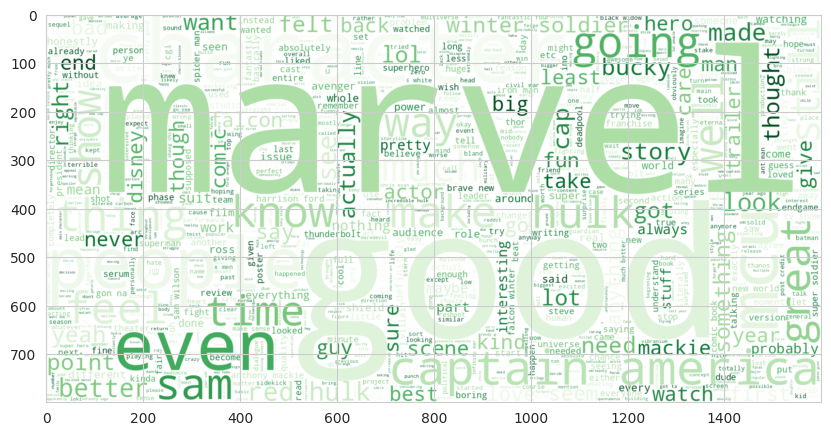

In [ ]:
from wordcloud import WordCloud

plt.figure(figsize = (10,10))
wc = WordCloud(background_color = 'white',colormap = 'Greens',max_words = 1000 , width = 1600 , height = 800).generate(" ".join(clean_df[clean_df.sentiment == "POSITIVE"].clean_text))
plt.imshow(wc , interpolation = 'bilinear')

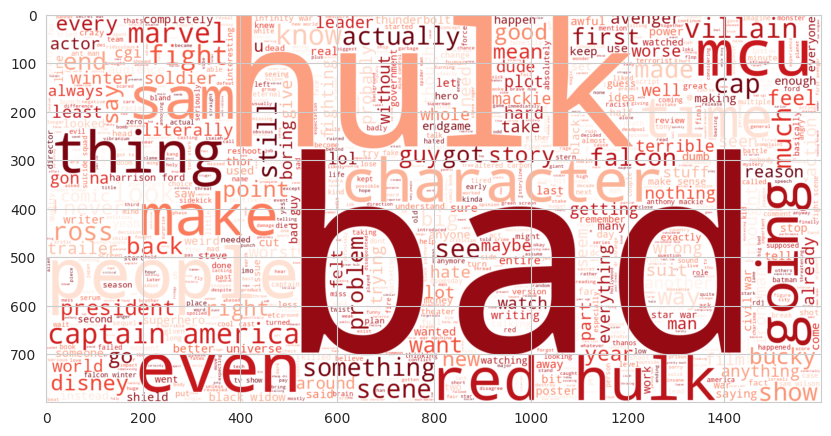

In [ ]:
from wordcloud import WordCloud

plt.figure(figsize = (10,10))
wc = WordCloud(background_color = 'white',colormap = 'Reds',max_words = 1000 , width = 1600 , height = 800).generate(" ".join(clean_df[clean_df.sentiment == "NEGATIVE"].clean_text))
plt.imshow(wc , interpolation = 'bilinear')

In [ ]:
# ==============================
# Train LDA
# ==============================
# 1. Preprocessing: Tokenization, Stopword Removal, and Lemmatization
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

clean_df["tokens"] = clean_df["clean_text"].apply(
    lambda x: [lemmatizer.lemmatize(word.lower()) for word in word_tokenize(x)
               if word.isalpha() and word.lower() not in stop_words]
)

dictionary_tweet = corpora.Dictionary(clean_df["tokens"])
corpus_tweet = [dictionary_tweet.doc2bow(text) for text in clean_df['tokens']]


lda_model = gensim.models.LdaModel(
    corpus=corpus_tweet,
    id2word=dictionary_tweet,
    num_topics=10,
    random_state=42,
    passes=10,
    iterations=200,
    alpha='auto',
    eta='auto',
    minimum_probability=0.01
)

# ==============================
# Train BERTopic on Reddit Data
# ==============================
topic_model_Reddit = BERTopic()
topics_tweet, probs_tweet = topic_model_Reddit.fit_transform(clean_df['clean_text'])



In [ ]:
from gensim.models.coherencemodel import CoherenceModel

# Extract the top 10 keywords for each BERTopic topic
ber_topic_tokens = [[word for word, _ in topic[:10]] for topic in bertopic_topics.values()]

# Filter out any empty topics to avoid errors
ber_topic_tokens = [topic for topic in ber_topic_tokens if topic]

# Compute Coherence Score for LDA
coherence_model_lda = CoherenceModel(
    model=lda_model, texts=clean_df['tokens'], dictionary=dictionary_tweet, coherence='c_v'
)
coherence_lda = coherence_model_lda.get_coherence()

# Compute Coherence Score for BERTopic using the LDA dictionary
coherence_model_bertopic = CoherenceModel(
    topics=ber_topic_tokens, texts=clean_df['tokens'], dictionary=dictionary_tweet, coherence='c_v'
)
coherence_bertopic = coherence_model_bertopic.get_coherence()

print(f"LDA Coherence Score: {coherence_lda:.3f}")
print(f"BERTopic Coherence Score: {coherence_bertopic:.3f}")

LDA Coherence Score: 0.557
BERTopic Coherence Score: 0.395


In [ ]:
# LDA diversity
def calculate_lda_topic_diversity(lda_model, top_n_words=10):
    topics = lda_model.show_topics(num_topics=lda_model.num_topics, num_words=top_n_words, formatted=False)
    unique_words = set()
    for topic in topics:
        unique_words.update([word for word, _ in topic[1]])
    return len(unique_words) / (top_n_words * lda_model.num_topics)

lda_topic_diversity = calculate_lda_topic_diversity(lda_model)

# BERTopic diversity
def calculate_topic_diversity(model, top_n_words=10):
    words = model.get_topics()
    unique_words = set()
    for topic in words.values():
        unique_words.update([word for word, _ in topic[:top_n_words]])
    return len(unique_words) / (top_n_words * len(words))

bertopic_topic_diversity = calculate_topic_diversity(topic_model_tweet)

print(f"LDA Topic Diversity Score: {lda_topic_diversity:.3f}")
print(f"BERTopic Topic Diversity Score: {bertopic_topic_diversity:.3f}")

LDA Topic Diversity Score: 0.910
BERTopic Topic Diversity Score: 0.827


In [ ]:
vis = pyLDAvis.gensim.prepare(lda_model, corpus_tweet, dictionary_tweet)

vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
7      0.265188  0.032477       1        1  52.112488
3      0.208077  0.031622       2        1  12.106941
6      0.144203  0.049630       3        1   9.624024
2      0.132554 -0.153601       4        1   9.098906
9     -0.063387  0.009623       5        1   3.347486
1     -0.149300 -0.276907       6        1   3.055681
0     -0.089348  0.032906       7        1   2.972225
4     -0.114113  0.105989       8        1   2.903989
8     -0.157939  0.106488       9        1   2.665858
5     -0.175934  0.061772      10        1   2.112403, topic_info=         Term         Freq        Total Category  logprob  loglift
111      hulk  1012.000000  1012.000000  Default  30.0000  30.0000
84    captain   620.000000   620.000000  Default  29.0000  29.0000
83    america   610.000000   610.000000  Default  28.0000  28.0000
22        man   589.000000   589.000000  Default  27.0000  27.0000
115       red   509.000000   509.000000  Default  26.0000  26.0000
...       ...          ...          ...      ...      ...      ...
864      dark    18.340942    60.638030  Topic10  -5.1507   2.6616
263   imagine    17.386737    78.210648  Topic10  -5.2041   2.3536
5413       eh    12.790321    24.060941  Topic10  -5.5112   3.2254
2231     true    12.690960    76.680153  Topic10  -5.5190   2.0586
192      post    12.828063   168.684098  Topic10  -5.5082   1.2810

[572 rows x 6 columns], token_table=      Topic      Freq      Term
term                           
582       1  0.127022      able
582       2  0.141135      able
582       4  0.635108      able
582       5  0.098795      able
2624      7  0.773165  accurate
...     ...       ...       ...
1106      8  0.879191      zemo
1163      2  0.688069      zero
1163      4  0.131758      zero
1163      6  0.161037      zero
9978      7  0.927110      zhao

[1061 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[8, 4, 7, 3, 10, 2, 1, 5, 9, 6])

In [ ]:
topic_model_Reddit.visualize_barchart()